In [44]:
%matplotlib inline

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [46]:
sns.set('paper', 'ticks')

col_w = (7. - .25) / 2.
full_w = 7.

# Load data and do some preprocessing

In [47]:
df = pd.DataFrame({k: np.squeeze(v) for k, v in np.load('../psy-work/decision/result.npz').iteritems()})

In [48]:
abbrev = {'UsherMcClelland': 'UMcC', 'DriftDiffusion': 'DD'}
df['condition'] = df.apply(lambda x: '{}, {}, {}'.format(
    abbrev[x['network']], x['scale'], x['share_thresholding_intercepts']), axis=1)
cond_order = ['UMcC, 1.0, False', 'DD, 1.0, False', 'DD, 0.2, False', 'DD, 1.0, True', 'DD, 0.2, True']

In [49]:
dfd = df.query('decided == True')

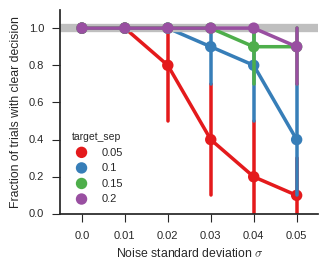

In [50]:
fig = plt.figure(figsize=(col_w, col_w / 1.2))
sns.pointplot('noise', 'decided', 'target_sep', data=df.query('network == "UsherMcClelland" and baseline == 1.'),
              palette='Set1')
plt.axhline(y=1., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.xlabel(r"Noise standard deviation $\sigma$")
plt.ylabel("Fraction of trials with clear decision")
sns.despine()
plt.tight_layout()

In [51]:
fig.savefig('../doc/paper/figures/decisions.pdf')

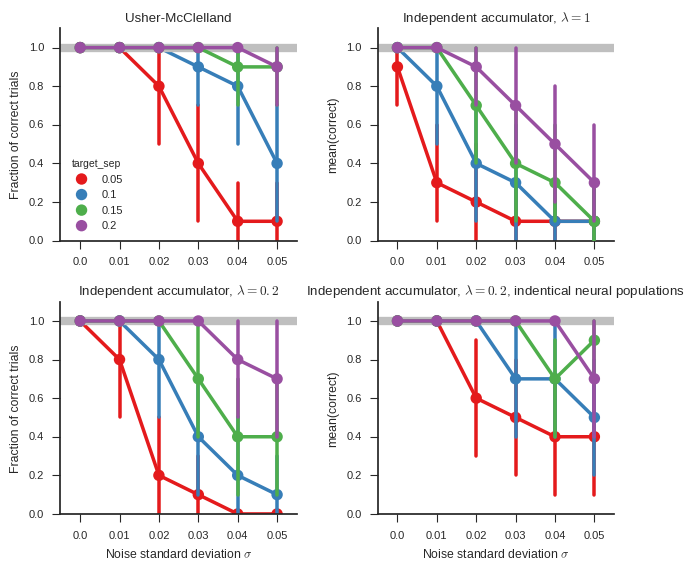

In [54]:
fig = plt.figure(figsize=(full_w, full_w / 1.2))
datasets = [
    df.query('network == "UsherMcClelland" and baseline == 1.'),
    df.query('network == "DriftDiffusion" and baseline == 1. and scale == 1. and not share_thresholding_intercepts'),
    df.query('network == "DriftDiffusion" and baseline == 1. and scale == .2 and not share_thresholding_intercepts'),
    df.query('network == "DriftDiffusion" and baseline == 1. and scale == .2 and share_thresholding_intercepts'),
]
titles = [
    "Usher-McClelland",
    r"Independent accumulator, $\lambda = 1$",
    r"Independent accumulator, $\lambda = 0.2$",
    r"Independent accumulator, $\lambda = 0.2$, indentical neural populations",
]

ax=None
for i, (title, data) in enumerate(zip(titles, datasets)):
    ax = plt.subplot(2, 2, i + 1, sharey=ax)
    sns.pointplot('noise', 'correct', 'target_sep', data=data, palette='Set1')
    if i > 0:
        ax.legend().remove()
    plt.axhline(y=1., lw=6, c=(0.75, 0.75, 0.75))
    plt.ylim(0, 1.1)
    plt.title(title)
    if i > 1:
        plt.xlabel(r"Noise standard deviation $\sigma$")
    else:
        plt.xlabel("")
    if i % 2 == 0:
        plt.ylabel("Fraction of correct trials")

sns.despine()
plt.tight_layout()

In [55]:
fig.savefig('../doc/paper/figures/correct.pdf')

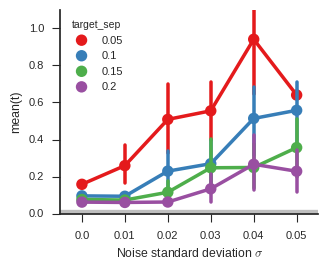

In [57]:
fig = plt.figure(figsize=(col_w, col_w / 1.2))
sns.pointplot('noise', 't', 'target_sep', data=df.query('network == "UsherMcClelland" and baseline == 1.'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.xlabel(r"Noise standard deviation $\sigma$")
sns.despine()
plt.tight_layout()

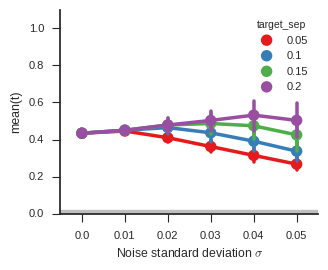

In [64]:
fig = plt.figure(figsize=(col_w, col_w / 1.2))
sns.pointplot('noise', 't', 'target_sep', data=df.query('network == "DriftDiffusion" and baseline == .2 and scale == 1. and not share_thresholding_intercepts'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.xlabel(r"Noise standard deviation $\sigma$")
sns.despine()
plt.tight_layout()

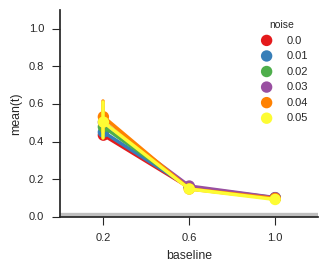

In [69]:
fig = plt.figure(figsize=(col_w, col_w / 1.2))
sns.pointplot('baseline', 't', 'noise', data=df.query('network == "DriftDiffusion" and target_sep == .2 and scale == 1. and not share_thresholding_intercepts'),
              palette='Set1')
plt.axhline(y=0., lw=6, c=(0.75, 0.75, 0.75))
plt.ylim(0, 1.1)
plt.xlabel(r"baseline")
sns.despine()
plt.tight_layout()